In [0]:
pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 117kB/s 
     |████████████████████████████████| 450kB 31.1MB/s 
     |████████████████████████████████| 3.8MB 40.6MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test, x_train = x_test/255.0, x_train/255.0 # normalization

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# check the shapes
print(x_test.shape)
x_train.shape

(10000, 28, 28, 1)


(60000, 28, 28, 1)

In [0]:
# add channel dimension, Tensorflow requests NHWC (or BHWC) format. Number/Batch_size, height, width, channels
# for 1D vectors, it should be Number/Batch_size, length
x_train = x_train[...,None]
x_test = x_test[..., None]


In [0]:
# another way to define models
# lets us access intermediate results too
input_image = tf.keras.layers.Input(shape = (28,28,1)) # Input layer, shape should be given as HWC
out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =1, padding ="same", activation = "relu")(input_image) # combining __init__ and call
out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =2, padding ="same", activation = "relu")(out)

out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =1, padding ="same", activation = "relu")(out)
out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =2, padding ="same", activation = "relu")(out)
flat = tf.keras.layers.Flatten()(out)
dense = tf.keras.layers.Dense(units = 256, activation = "relu")(flat)
logits = tf.keras.layers.Dense(units = 10, activation = "sigmoid")(dense)

# Make a model by providing the input layer and output layer
model = tf.keras.models.Model(input_image, logits)

In [0]:
# as ususal, pick optimizer, loss and metrics
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
# store history in a variable
h = model.fit(x_train, y_train,
         epochs = 3,
         batch_size = 32,
         validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 58s 959us/sample - loss: 0.1740 - accuracy: 0.9492 - val_loss: 0.0625 - val_accuracy: 0.9802
Epoch 2/3
60000/60000 [==============================] - 57s 950us/sample - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0531 - val_accuracy: 0.9840
Epoch 3/3
60000/60000 [==============================] - 57s 956us/sample - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0361 - val_accuracy: 0.9878


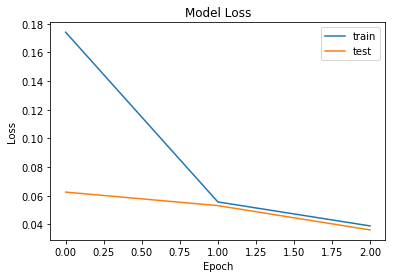

In [0]:
# plot curves
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

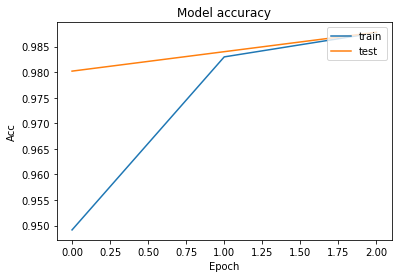

In [0]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [0]:
# custom layer
class fc(tf.keras.layers.Layer):
  def __init__(self, units, activation):
    super().__init__()
    self.units = units
    self.activation = activation
    
  def build(self, input_shape):
    self.W = tf.Variable(initial_value = np.random.randn(input_shape[1], self.units).astype(np.float32))
    self.b = tf.Variable(initial_value = np.random.randn(self.units).astype(np.float32))
    
  def call(self, inputs):
    return self.activation(tf.matmul(inputs, self.W)+self.b[None])

In [0]:
input_image = tf.keras.layers.Input(shape = (28,28,1))
out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =1, padding ="same", activation = "relu")(input_image)
out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =2, padding ="same", activation = "relu")(out)

out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =1, padding ="same", activation = "relu")(out)
out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =2, padding ="same", activation = "relu")(out)
flat = tf.keras.layers.Flatten()(out)
dense = fc(units = 256, activation = tf.nn.relu)(flat)
logits = fc(units = 10, activation = tf.nn.softmax)(dense) # fits in exactly like a normal layer

model = tf.keras.models.Model(input_image, logits)

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
h = model.fit(x_train, y_train,
         epochs = 3,
         batch_size = 32,
         validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 57s 957us/sample - loss: 0.5602 - accuracy: 0.8841 - val_loss: 0.1339 - val_accuracy: 0.9619
Epoch 2/3
60000/60000 [==============================] - 59s 990us/sample - loss: 0.1182 - accuracy: 0.9649 - val_loss: 0.0883 - val_accuracy: 0.9732
Epoch 3/3
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0857 - accuracy: 0.9743 - val_loss: 0.0693 - val_accuracy: 0.9793
